# Neural Net Reguression

# Data1:"2019-05-01"~"2019-06-06"<br>Data2:"2020-05-01"~"2020-06-06"<br><br>lr=0.01<br>Dropout=0.3<br>Cross Validation K-Fold

In [30]:
import warnings
warnings.simplefilter("ignore")

# change cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [31]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# ML module
import sklearn
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split ## splite data into train data and validation data
from sklearn.preprocessing import StandardScaler     
from sklearn.metrics import r2_score                 
from sklearn.metrics import mean_squared_error

In [33]:
PROJECT_PATH = os.getcwd()  ## current directory
PROJECT_PATH

'C:\\Users\\thetnaingtun\\MonitoringAI_CPW_Local\\MonitoringAI_CPW\\sample_code'

In [34]:
# read preprocessed pickle data  
df_1min_preprocessed = pd.read_pickle(PROJECT_PATH + "\\..\\DataForFSI4135\\Data_for_FSI4135_01.pkl")
df_1min_preprocessed.dropna(inplace=True)

In [35]:
target_col = "TI_4191.PV"

In [36]:
list_ToPick_1_2 = df_1min_preprocessed.columns.tolist()
list_ToPick_1_2.pop()
list_ToPick_1_2

['TI_4124.PV',
 'LC_4103.PV',
 'LC_4105.PV',
 'LC_4105.OP',
 'PC_4108.PV',
 'TI_4127.PV',
 'LC_4109.PV',
 'TI_4128.PV',
 'FI_4118.PV',
 'TI_4132.PV',
 'TI_4131.PV',
 'LC_4119.PV',
 'TI_4133.PV',
 'FC_4136.PV',
 'FI_4120.PV',
 'LC_4120.PV',
 'TI_4134.PV',
 'TI_4190.PV',
 'PC_4111.PV',
 'PC_4111.OP',
 'TI_4135.PV',
 'TI_4165.PV',
 'TI_4152.PV',
 'TI_4164.PV',
 'TI_4159.PV',
 'TI_4160.PV',
 'TI_4163.PV',
 'TI_4136.PV',
 'TI_4140.PV',
 'TC_4120.PV',
 'TI_4137.PV',
 'TI_4138.PV',
 'TI_4162.PV',
 'TI_4161.PV',
 'TI_4139.PV',
 'PC_4120.PV',
 'FI_4149.PV',
 'PC_4114.PV',
 'FC_4121.PV',
 'FC_4122.PV',
 'FC_4123.PV',
 'FC_4124.PV',
 'TC_4121.PV',
 'TI_4141.PV',
 'TI_4142.PV',
 'TI_4180.PV',
 'TI_4143.PV',
 'TI_4146.PV',
 'TC_4158.PV',
 'FC_4138.PV',
 'TI_4148.PV',
 'TI_4147.PV',
 'FC_4137.PV',
 'TI_4144.PV',
 'PC_4112.PV',
 'LC_4123.PV',
 'FC_4125.PV',
 'FC_4126.PV',
 'LC_4122.PV',
 'PC_4112.OP',
 'PC_4112.OP_1',
 'PI_4128.PV',
 'TI_4145.PV',
 'LC_4124.PV',
 'LC_4125.PV',
 'FC_4132.PV',
 'FSI417

In [37]:
# # pick up important tag
# list_ToPick_1_2 = [
# #     "TI_4132.PV", #C-4102(H2S Stripper)塔頂温度
# #     "FI_4119.PV", #C-4102(H2S Stripper)Reflux流量
# #     "TI_4131.PV", #C-4102(H2S Stripper)Feed温度
#     "LC_4119.PV", #C-4102(H2S Stripper)Level
#     "TI_4133.PV", #C-4102(H2S Stripper)BTM温度
# #     "FC_4136.PV", #C-4102(H2S Stripper)Stripping steam
# #     "FI_4120.PV", #D-4110(H2S Stripper OH Receiver)ガス流量
# #     "TI_4134.PV", #D-4110(H2S Stripper OH Receiver)液温度
# #     "TI_4190.PV", #C-4103(Fractionator)BTM液E-4108出口温度
#     "PC_4111.PV", #D-4110(H2S Stripper OH Receiver)圧力
# #     "PC_4111.OP", #D-4110(H2S Stripper OH Receiver)圧力調節弁開度
#     "TI_4135.PV", #F-4102(Fractionator feed furnace)入口温度
# #     "TI_4165.PV", #F-4102(Fractionator feed furnace)ダクト温度
# #     "TI_4140.PV", #F-4102(Fractionator feed furnace)出口温度
#     "TC_4120.PV", #F-4102(Fractionator feed furnace)出口温度
#     "FI_4149.PV", #F-4102(Fractionator feed furnace)燃料ガス入口流量
#     "FI_4145.PV", #F-4102(Fractionator feed furnace)燃料油入口流量
#     "FC_4121.PV", #F-4102(Fractionator feed furnace)入口各tube流量
# #     "FC_4122.PV", #F-4102(Fractionator feed furnace)入口各tube流量
# #     "FC_4123.PV", #F-4102(Fractionator feed furnace)入口各tube流量
# #     "FC_4124.PV", #F-4102(Fractionator feed furnace)入口各tube流量
#     "TC_4121.PV", #C-4103(Fractionator)塔頂温度
# #     "TI_4141.PV", #C-4103(Fractionator)塔頂温度
# #     "TI_4142.PV", #C-4103(Fractionator)Tray9抜出温度
# #     "TI_4180.PV", #C-4103(Fractionator)Tray9温度
# #     "TI_4143.PV", #C-4103(Fractionator)Feed zone温度
# #     "TI_4146.PV", #C-4103(Fractionator)Tray7抜出温度
#     "FC_4138.PV", #C-4104(Fractionator Side Stripper)Stripping steam流量
#     "TI_4148.PV", #C-4104(Fractionator Side Stripper)BTM温度
#     "TI_4147.PV", #C-4103(Fractionator)Side reflux戻り温度
#     "FC_4137.PV", #C-4103(Fractionator)Stripping steam流量
#     "TI_4144.PV", #C-4103(Fractionator)BTM温度
#     "PC_4112.PV", #C-4103(Fractionator)塔頂圧力
#     "LC_4123.PV", #C-4104(Fractionator Side Stripper)Level
# #     "FC_4125.PV", #C-4103(Fractionator)Cold Reflux流量
#     "FC_4126.PV", #C-4103(Fractionator)Side reflux流量
#     "LC_4122.PV", #C-4103(Fractionator)Level
# #                                        "PC_4112.OP", #(Fractionator)塔頂圧力調節弁開度
# #                                        "PC_4112.OP_MakeUpSide", #C-4103(Fractionator)塔頂圧力調節弁開度(make-up side)
# #                                        "PC_4112.OP_FlareSide", #C-4103(Fractionator)塔頂圧力調節弁開度(flare side)
#     "PI_4128.PV", #D-4111(Fractionator OH Drum)圧力
#     "TI_4145.PV", #D-4111(Fractionator OH Drum)温度
# #     "LC_4125.PV", #D-4111(Fractionator OH Drum)water level
#     "LC_4122.OP", #C-4103
#     "FI_4117.PV", #'M-4101Back wash oil
#     "AI_41022.PV", #Sp.Gr
#     "FSI4135.PV", #TLRES　R/D
# #     "TI_4151.PV", #TLRES　R/D
# #     "PCX4129.PV", #P-4102 リカバリータービンフレッシュオイル圧力
# #     "PQ_62003.PV", #HS TLRES to FCC
# #     "PQ_62004.PV", #LS TLRES to FCC
# #     "FC_61001.PV", #TLRES to Vf-2
#     "HC_4113.OP", #E-4108 Bypass
# #     "TI_4191.PV", #E-4101 TLRESout
# ]

In [38]:
# df_1min_originalData_all.iloc[52272:,:]
df_2019_May = df_1min_preprocessed['2016-10-15 00:00:00':'2016-11-15 23:59:00']

In [39]:
# df_1min_originalData_all.iloc[52272:,:]
df_2019_June = df_1min_preprocessed['2016-11-16 00:00:00':'2016-12-15 23:59:00']

In [40]:
# df_1min_originalData_all.iloc[52272:,:]
df_2020_May = df_1min_preprocessed['2016-10-15 00:00:00':'2016-11-15 23:59:00']

In [41]:
# df_1min_originalData_all.iloc[52272:,:]
df_2020_June = df_1min_preprocessed['2016-11-16 00:00:00':'2016-12-15 23:59:00']

# Connect split data to train+validation data(2019.May and 2020.May) and trial data(2019.June and 2020.June)
## *the above choice of the train+validation data and trial data is one of example

In [42]:
# train and validation data
df_train = pd.concat([df_2019_May, df_2020_May], axis=0)

In [43]:
# trial data
df_trial = pd.concat([df_2019_June, df_2020_June], axis=0)

In [44]:
# train and validation data
df_y = df_train.loc[:,target_col] # Target
df_X = df_train[list_ToPick_1_2] # Feature

In [45]:
# trial data

df_y_trial = df_trial.loc[:,target_col] # target
df_X_trial = df_trial[list_ToPick_1_2] # Feature

# Standalize Data

In [46]:
# standalize train and validation data
sc_y_train = StandardScaler()
train_y_std = sc_y_train.fit_transform(df_y.values.reshape(-1,1))
sc_X_train = StandardScaler()
train_X_std = sc_X_train.fit_transform(df_X.values)



In [47]:
# standalize traial data
trial_X_std_2019_ = sc_X_train.transform(df_X_trial.values)
#trial_X_std_2020_ = sc_X_train.transform(df_X_trial['2020'].values)

In [48]:
# standalize trial data
trial_y_std_2019_ = sc_y_train.transform(df_y_trial.values.reshape(-1, 1))
#trial_y_std_2020_ = sc_y_train.transform(df_y_trial['2020'].values.reshape(1, -1))

# Execute Neural Net Learning

In [49]:
import random as rn

#　Neural Net Module
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential      ## Set NN model
from keras.layers import Dense, Dropout  ## Set Dense
from keras.optimizers import Adam        ## Set Optimization
from keras import regularizers           ## Set Regularizer

In [50]:
# # fix randomness
# os.environ['PYTHONHASHSEED'] = '0'
# np.random.seed(0)
# rn.seed(0)

# session_conf = tf.ConfigProto(
#     intra_op_parallelism_threads=1,
#     inter_op_parallelism_threads=1
# )

# ###　Keras,tensorflow　###
# tf.set_random_seed(0)
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# K.set_session(sess)
# ###　Keras,tensorflow　###

In [51]:
def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    rn.seed(seed) # random関数のシードを固定
    np.random.seed(seed) # numpyのシードを固定
    tf.random.set_seed(seed) # tensorflowのシードを固定

In [52]:
###　Keras　###
# construct NN
def build_model(inputshape):
    model = Sequential() ## Set NN model
    model.add(Dense(units=300, activation='relu', input_shape=(inputshape,), kernel_regularizer=regularizers.l2(0.01))) ## Set Fully connected layer. input = Feature number
    model.add(Dropout(0.3)) ## Set dropout
    model.add(Dense(units=150, activation='relu', kernel_regularizer=regularizers.l2(0.01))) ## Set Fully connected layer
    model.add(Dropout(0.3)) ## Set dropout
    model.add(Dense(units=75, activation='relu', kernel_regularizer=regularizers.l2(0.01))) ## Set Fully connected layer
    model.add(Dropout(0.3)) ## Set dropout
    model.add(Dense(units=1)) ## units = Target number
    model.compile(optimizer='Adam', loss='mean_squared_error') ## set laerning process
    return model
###　Keras　###

# Cross Validation K-fold

In [53]:
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping

In [54]:
# def NN_cross_validate(train_X, train_y, n_splits, epoch, kf_shuffle=True,\
#               early_stopping = EarlyStopping(monitor='val_loss', min_delta=-0.0001, patience=3, verbose=0, mode='auto')):
def NN_cross_validate(train_X, train_y, n_splits, epoch, kf_shuffle=True):    
    kf = KFold(n_splits=n_splits, shuffle=kf_shuffle)

    models, train_scores, validation_scores= [],[],[]

    for train_index, val_index in kf.split(train_X,train_y):
        
        train_data=train_X[train_index]
        train_label=train_y[train_index]
        val_data=train_X[val_index]
        val_label=train_y_std[val_index]

        model=build_model(train_X.shape[1])
        history=model.fit(train_data,
                          train_label,
                          epochs=epoch,
                          batch_size=2048,
                          validation_data=(val_data,val_label),
  #                        callbacks=[early_stopping],
                          verbose = 1 ## not show learning log                         
                         )

        models.append(model)

        loss=history.history['loss']
        val_loss=history.history['val_loss']

        # visualize learning curve
        x = history.epoch
        plt.plot(x, loss, label="loss")
        plt.plot(x, val_loss, label="val_loss")
        plt.title("Learning Curve")
        plt.legend(loc='best')
        plt.xlabel("epoch")
        plt.ylabel("MSE")
        plt.grid()
        plt.show()

        pred_train_y_std = model.predict(train_data) ## predict target value by stadalized train data      
        print('R^2 train_std: %.3f' % r2_score(y_true=train_label, \
                                               y_pred=pred_train_y_std, multioutput='raw_values'))


        pred_val_y_std = model.predict(val_data) ## predict target value by stadalized validation data
        print('R^2 val_std: %.3f' % r2_score(y_true=val_label, \
                                             y_pred=pred_val_y_std, multioutput='raw_values'))

        train_score = r2_score(y_true=train_label, y_pred=pred_train_y_std, multioutput='raw_values')
        train_scores.append(train_score)

        validation_score= r2_score(y_true=val_label, y_pred=pred_val_y_std, multioutput='raw_values') 
        validation_scores.append(validation_score)

    fig, ax1 = plt.subplots(figsize=(3, 3))
    x = list(range(len(models)))

    ax1.plot(x, train_scores,"-",label="train_scores", lw=1, marker='o', markersize=2, markeredgewidth=4) 
    ax1.plot(x, validation_scores,"-",label="validation_scores", alpha=0.8, lw=1, marker='o', markersize=2, markeredgewidth=4)

    ax1.set_title('train_score vs validation_score')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('score')
    ax1.legend(loc='lower left', bbox_to_anchor=(1, 0))
    ax1.grid() ## Grid

    plt.show()
    return models

In [55]:
train_y_std

array([[ 0.50492695],
       [ 0.50968008],
       [ 0.51443321],
       ...,
       [-0.32554649],
       [-0.31741464],
       [-0.30928279]])

Epoch 1/100
4/4 [==============================] - 1s 115ms/step - loss: 5.4090 - val_loss: 4.4818
Epoch 2/100
4/4 [==============================] - 0s 44ms/step - loss: 4.6958 - val_loss: 4.3225
Epoch 3/100
4/4 [==============================] - 0s 55ms/step - loss: 4.4674 - val_loss: 4.1315
Epoch 4/100
4/4 [==============================] - 0s 51ms/step - loss: 4.2183 - val_loss: 3.9840
Epoch 5/100
4/4 [==============================] - 0s 67ms/step - loss: 4.0450 - val_loss: 3.7996
Epoch 6/100
4/4 [==============================] - 0s 49ms/step - loss: 3.8373 - val_loss: 3.6278
Epoch 7/100
4/4 [==============================] - 0s 48ms/step - loss: 3.6836 - val_loss: 3.4711
Epoch 8/100
4/4 [==============================] - 0s 68ms/step - loss: 3.5356 - val_loss: 3.3272
Epoch 9/100
4/4 [==============================] - 0s 57ms/step - loss: 3.3509 - val_loss: 3.1813
Epoch 10/100
4/4 [==============================] - 0s 48ms/step - loss: 3.2164 - val_loss: 3.0306
Epoch 11/100
4/4 [

Epoch 84/100
4/4 [==============================] - 0s 36ms/step - loss: 0.1860 - val_loss: 0.1628
Epoch 85/100
4/4 [==============================] - 0s 36ms/step - loss: 0.1818 - val_loss: 0.1596
Epoch 86/100
4/4 [==============================] - 0s 38ms/step - loss: 0.1775 - val_loss: 0.1588
Epoch 87/100
4/4 [==============================] - 0s 36ms/step - loss: 0.1735 - val_loss: 0.1523
Epoch 88/100
4/4 [==============================] - 0s 35ms/step - loss: 0.1726 - val_loss: 0.1455
Epoch 89/100
4/4 [==============================] - 0s 38ms/step - loss: 0.1660 - val_loss: 0.1577
Epoch 90/100
4/4 [==============================] - 0s 36ms/step - loss: 0.1725 - val_loss: 0.1432
Epoch 91/100
4/4 [==============================] - 0s 35ms/step - loss: 0.1589 - val_loss: 0.1373
Epoch 92/100
4/4 [==============================] - 0s 36ms/step - loss: 0.1601 - val_loss: 0.1317
Epoch 93/100
4/4 [==============================] - 0s 37ms/step - loss: 0.1546 - val_loss: 0.1350
Epoch 94/1

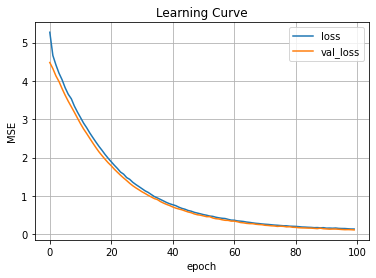

R^2 train_std: 0.990
R^2 val_std: 0.985
Epoch 1/100
4/4 [==============================] - 1s 80ms/step - loss: 5.6785 - val_loss: 4.6283
Epoch 2/100
4/4 [==============================] - 0s 36ms/step - loss: 4.7385 - val_loss: 4.2801
Epoch 3/100
4/4 [==============================] - 0s 37ms/step - loss: 4.5181 - val_loss: 4.0995
Epoch 4/100
4/4 [==============================] - 0s 36ms/step - loss: 4.3096 - val_loss: 3.9930
Epoch 5/100
4/4 [==============================] - 0s 39ms/step - loss: 4.0868 - val_loss: 3.8721
Epoch 6/100
4/4 [==============================] - 0s 37ms/step - loss: 3.9405 - val_loss: 3.7208
Epoch 7/100
4/4 [==============================] - 0s 36ms/step - loss: 3.7586 - val_loss: 3.5424
Epoch 8/100
4/4 [==============================] - 0s 38ms/step - loss: 3.5950 - val_loss: 3.3550
Epoch 9/100
4/4 [==============================] - 0s 38ms/step - loss: 3.4275 - val_loss: 3.1944
Epoch 10/100
4/4 [==============================] - 0s 37ms/step - loss: 3.274

4/4 [==============================] - 0s 35ms/step - loss: 0.2179 - val_loss: 0.1871
Epoch 84/100
4/4 [==============================] - 0s 37ms/step - loss: 0.2090 - val_loss: 0.1804
Epoch 85/100
4/4 [==============================] - 0s 36ms/step - loss: 0.2017 - val_loss: 0.1772
Epoch 86/100
4/4 [==============================] - 0s 36ms/step - loss: 0.2066 - val_loss: 0.1788
Epoch 87/100
4/4 [==============================] - 0s 37ms/step - loss: 0.1937 - val_loss: 0.1701
Epoch 88/100
4/4 [==============================] - 0s 36ms/step - loss: 0.1888 - val_loss: 0.1655
Epoch 89/100
4/4 [==============================] - 0s 36ms/step - loss: 0.1850 - val_loss: 0.1642
Epoch 90/100
4/4 [==============================] - 0s 36ms/step - loss: 0.1807 - val_loss: 0.1581
Epoch 91/100
4/4 [==============================] - 0s 36ms/step - loss: 0.1799 - val_loss: 0.1537
Epoch 92/100
4/4 [==============================] - 0s 36ms/step - loss: 0.1751 - val_loss: 0.1464
Epoch 93/100
4/4 [=====

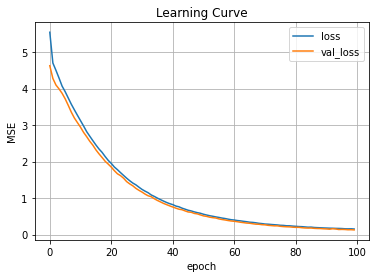

R^2 train_std: 0.987
R^2 val_std: 0.987
Epoch 1/100
4/4 [==============================] - 1s 83ms/step - loss: 5.5799 - val_loss: 4.5850
Epoch 2/100
4/4 [==============================] - 0s 36ms/step - loss: 4.8095 - val_loss: 4.3028
Epoch 3/100
4/4 [==============================] - 0s 35ms/step - loss: 4.5251 - val_loss: 4.1248
Epoch 4/100
4/4 [==============================] - 0s 35ms/step - loss: 4.3119 - val_loss: 4.0209
Epoch 5/100
4/4 [==============================] - 0s 39ms/step - loss: 4.1486 - val_loss: 3.8845
Epoch 6/100
4/4 [==============================] - 0s 36ms/step - loss: 3.9847 - val_loss: 3.6997
Epoch 7/100
4/4 [==============================] - 0s 37ms/step - loss: 3.8023 - val_loss: 3.5263
Epoch 8/100
4/4 [==============================] - 0s 37ms/step - loss: 3.6591 - val_loss: 3.3813
Epoch 9/100
4/4 [==============================] - 0s 36ms/step - loss: 3.4834 - val_loss: 3.2470
Epoch 10/100
4/4 [==============================] - 0s 36ms/step - loss: 3.349

4/4 [==============================] - 0s 35ms/step - loss: 0.2556 - val_loss: 0.2263
Epoch 84/100
4/4 [==============================] - 0s 37ms/step - loss: 0.2596 - val_loss: 0.2185
Epoch 85/100
4/4 [==============================] - 0s 36ms/step - loss: 0.2428 - val_loss: 0.2129
Epoch 86/100
4/4 [==============================] - 0s 36ms/step - loss: 0.2402 - val_loss: 0.2085
Epoch 87/100
4/4 [==============================] - 0s 35ms/step - loss: 0.2346 - val_loss: 0.2031
Epoch 88/100
4/4 [==============================] - 0s 35ms/step - loss: 0.2410 - val_loss: 0.1991
Epoch 89/100
4/4 [==============================] - 0s 36ms/step - loss: 0.2247 - val_loss: 0.1944
Epoch 90/100
4/4 [==============================] - 0s 36ms/step - loss: 0.2227 - val_loss: 0.1880
Epoch 91/100
4/4 [==============================] - 0s 36ms/step - loss: 0.2166 - val_loss: 0.1834
Epoch 92/100
4/4 [==============================] - 0s 37ms/step - loss: 0.2124 - val_loss: 0.1797
Epoch 93/100
4/4 [=====

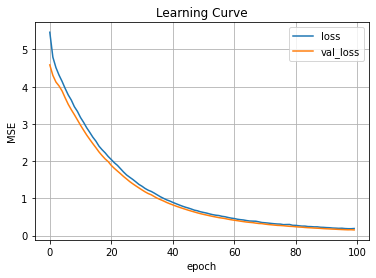

R^2 train_std: 0.982
R^2 val_std: 0.988
Epoch 1/100
4/4 [==============================] - 1s 82ms/step - loss: 5.8100 - val_loss: 4.8492
Epoch 2/100
4/4 [==============================] - 0s 35ms/step - loss: 4.8567 - val_loss: 4.4267
Epoch 3/100
4/4 [==============================] - 0s 35ms/step - loss: 4.5270 - val_loss: 4.2441
Epoch 4/100
4/4 [==============================] - 0s 38ms/step - loss: 4.3181 - val_loss: 4.1031
Epoch 5/100
4/4 [==============================] - 0s 35ms/step - loss: 4.1331 - val_loss: 3.9627
Epoch 6/100
4/4 [==============================] - 0s 36ms/step - loss: 3.9370 - val_loss: 3.7969
Epoch 7/100
4/4 [==============================] - 0s 35ms/step - loss: 3.7947 - val_loss: 3.6186
Epoch 8/100
4/4 [==============================] - 0s 36ms/step - loss: 3.6375 - val_loss: 3.4552
Epoch 9/100
4/4 [==============================] - 0s 36ms/step - loss: 3.4668 - val_loss: 3.3118
Epoch 10/100
4/4 [==============================] - 0s 36ms/step - loss: 3.324

4/4 [==============================] - 0s 35ms/step - loss: 0.2163 - val_loss: 0.1822
Epoch 84/100
4/4 [==============================] - 0s 37ms/step - loss: 0.2037 - val_loss: 0.2004
Epoch 85/100
4/4 [==============================] - 0s 37ms/step - loss: 0.2064 - val_loss: 0.1906
Epoch 86/100
4/4 [==============================] - 0s 36ms/step - loss: 0.2056 - val_loss: 0.1933
Epoch 87/100
4/4 [==============================] - 0s 35ms/step - loss: 0.1981 - val_loss: 0.1685
Epoch 88/100
4/4 [==============================] - 0s 36ms/step - loss: 0.1844 - val_loss: 0.1611
Epoch 89/100
4/4 [==============================] - 0s 36ms/step - loss: 0.1815 - val_loss: 0.1644
Epoch 90/100
4/4 [==============================] - 0s 35ms/step - loss: 0.1808 - val_loss: 0.1533
Epoch 91/100
4/4 [==============================] - 0s 36ms/step - loss: 0.1733 - val_loss: 0.1502
Epoch 92/100
4/4 [==============================] - 0s 37ms/step - loss: 0.1744 - val_loss: 0.1585
Epoch 93/100
4/4 [=====

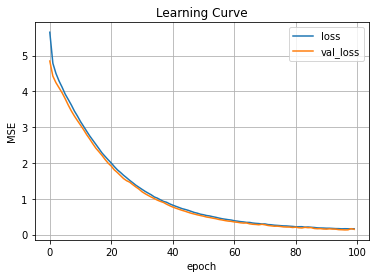

R^2 train_std: 0.972
R^2 val_std: 0.966


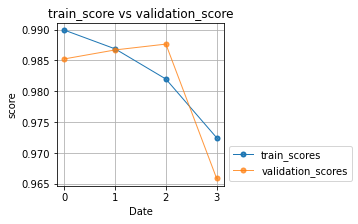

In [56]:
models = NN_cross_validate(train_X_std, train_y_std, 4, 100)

In [57]:
# output ensemble mean value from rach models developed by cross-validation
def def_pred_ensemble(model, df_trial):
    sum_predictedValue = 0
    for i in range(len(model)):
        sum_predictedValue = sum_predictedValue + model[i].predict(df_trial)

    pred_ensemble = sum_predictedValue/len(model)
    return pred_ensemble

In [58]:
pred_ensemble = def_pred_ensemble(models, trial_X_std_2019_)
pred_ensemble

array([[-0.58353823],
       [-0.5782782 ],
       [-0.48067153],
       ...,
       [ 0.7053813 ],
       [ 0.7383642 ],
       [ 0.7638386 ]], dtype=float32)

In [59]:
def def_score_ensemble(model, df_trial_X, df_trial_y, target_unit): #(models, standarized_X, standarized_y)
    for i in range(len(models)):
        pred_train_y_std = models[i].predict(df_trial_X) ## predict target value by stadalized trial data
        print('R2 score_{}: %.3f'.format(i) % r2_score(y_true=df_trial_y,\
                                          y_pred=pred_train_y_std,\
                                          multioutput='raw_values'))        
        
        pred_train_y_inv = sc_y_train.inverse_transform(X=pred_train_y_std) ## inverse transform to before-standarized-pred_train_y
        true_train_y_inv = sc_y_train.inverse_transform(X=df_trial_y) ## inverse transform to before-standarized-pred_true_y       
        print('RMSE[{}]: %.3f'.format(target_unit) % np.sqrt(mean_squared_error(true_train_y_inv, pred_train_y_inv)))   
    
    # get ensmble score
    pred_ensemble = def_pred_ensemble(model, df_trial_X)
    train_score = r2_score(y_true = df_trial_y, \
                           y_pred = pred_ensemble,\
                           multioutput='raw_values')
    print('ensemble score: %.3f' %train_score)
    
    pred_train_y_inv = sc_y_train.inverse_transform(X=pred_ensemble)
    print('ensemble RMSE[{}]: %.3f'.format(target_unit) % np.sqrt(mean_squared_error(true_train_y_inv, pred_train_y_inv)))
    return 

In [60]:
print("R2 Score for Trial Dataset")
score_predictedEnsemble = def_score_ensemble(models,trial_X_std_2019_,trial_y_std_2019_.reshape(-1,1), "m3/h")

R2 Score for Trial Dataset
R2 score_0: 0.746
RMSE[m3/h]: 3.022
R2 score_1: 0.782
RMSE[m3/h]: 2.798
R2 score_2: 0.638
RMSE[m3/h]: 3.607
R2 score_3: 0.586
RMSE[m3/h]: 3.855
ensemble score: 0.708
ensemble RMSE[m3/h]: 3.238


In [61]:
select_model_id = 3 # selecet model_id you want to use. put "-1" if you want to use ensmble model

def calc_pred(models,select_model_id,df_x): # switch procedure depends on 1model or ensmble model
    if (select_model_id<0):
        pred_ = def_pred_ensemble(models,df_x)
    else:
        pred_ = models[select_model_id].predict(df_x)
    return pred_

# Predict target value with trial data(2019June&2020June) 

In [62]:
x_2019 = df_trial["2019"].index

AssertionError: <class 'numpy.ndarray'>

In [ ]:
pred_trial_y_std_ = calc_pred(models, select_model_id, trial_X_std_2019_) ## predict target value by stadalized trial data
pred_trial_y_inv_2019 = sc_y_train.inverse_transform(X=pred_trial_y_std_) ## inverse transform to before-standarized-pred_train_y

In [ ]:
# plot measured value and predicted value
fig = plt.figure(figsize=(15, 4)) 
plt.plot(x_2019,df_y_trial['2019'].values.reshape(-1,1),"-",label="Measured")
plt.plot(x_2019,pred_trial_y_inv_2019,"-",label="Predicted", alpha=0.8)
plt.title('{} Measured vs Predicted'.format(target_col))
plt.xlabel('Date')
plt.ylabel(target_col+" "+"[N3/h]")
plt.legend(loc='best')
plt.grid()

plt.show()
print("trial_score:", r2_score(y_true=df_y_trial['2019'].values.reshape(-1,1),\
                               y_pred=pred_trial_y_inv_2019))
print('trial_RMSE: %.3f' % np.sqrt(mean_squared_error(y_true=df_y_trial['2019'].values.reshape(-1,1),\
                                                y_pred=pred_trial_y_inv_2019)))

# 2020年

In [ ]:
x_2020 = df_trial["2020"].index

In [ ]:
pred_trial_y_std_ = calc_pred(models,select_model_id,trial_X_std_2020_) 
pred_trial_y_inv_2020 = sc_y_train.inverse_transform(X=pred_trial_y_std_)

In [63]:
l1="[1]: Test"
l2=[1,2,3,4]
pick=[l1,l2]
pick

['[1]: Test', [1, 2, 3, 4]]

In [ ]:
# plot measured value and predicted value
fig = plt.figure(figsize=(15, 4))
plt.plot(x_2020,df_y_trial['2020'].values.reshape(-1,1),"-",label="Measured")
plt.plot(x_2020,pred_trial_y_inv_2020,"-",label="Predicted", alpha=0.8)
plt.title('{} Measured vs Predicted'.format(target_col))
plt.xlabel('Date')
plt.ylabel(target_col+" "+"[N3/h]")
plt.legend(loc='best')
plt.grid()

plt.show()
print("trial_score:", r2_score(y_true=df_y_trial['2020'].values.reshape(-1,1),\
                               y_pred=pred_trial_y_inv_2020))
print('trial_RMSE: %.3f' % np.sqrt(mean_squared_error(y_true=df_y_trial['2020'].values.reshape(-1,1),\
                                                y_pred=pred_trial_y_inv_2020)))

# Save the model

In [ ]:
model = models[select_model_id]
model.save('keras_nn_model_fsi4135.h5')

In [ ]:
contents = '[1]: models'
pickle_models = [contents,
                 models
                ]

In [ ]:
with open('models.pkl', mode='wb') as f:
    pickle.dump(pickle_models, f)

In [ ]:
# call  keras model
# from keras.models import load_model
# model = load_model('keras_nn_model_fsi4135.h5')

In [ ]:
# models load
with open('models.pkl', mode='rb') as f:
    pickle_in = pickle.load(f)
models = pickle_in[1]
ensmble_pred = calc_pred(models,-1,trial_X_std_2019_)